## Confusion Matrix of Make Dataset using k-NN

분류 모델의 성능을 측정하기 위한 confusion matrix

실제 타겟의 값을 분류 모델을 통해 예측한 값과 비교

Confusion matrix를 통해 분류 모델의 성능을 확인할 수 있으며, 어떤 종류의 오류가 발생하는지 확인 가능

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
features, target = make_classification(n_samples=15000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)
target_names = ["0", "1", "2"]

[[-1.08371712 -0.57664458 -1.25943764  2.0153572   1.        ]
 [ 0.11527784 -1.67689707 -1.61673093 -1.42410517  0.        ]]


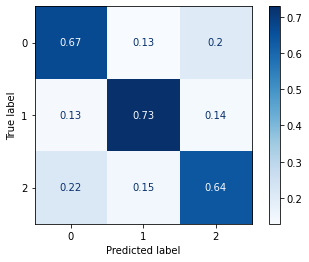

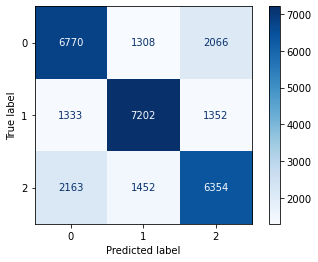

In [3]:
from collections import Counter

max_seed = 10

predict_list = []
label_list = []
error_value = []
error_seed = []
error = []
error_list = []

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', algorithm='brute', metric='mahalanobis', metric_params={'VI': np.cov(x_train)}, n_jobs=-1)
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    equal = np.equal(predict, y_test)
    idx = np.where(equal == False)
    if len(idx[0]) != 0:
        for idx in idx[0]:
            values = x_test[idx]
            values_seed = np.append(values, seed)
            values = np.append(values, y_test[idx])
            error_value.append(values)
            error_seed.append(values_seed)

error_value = np.array(error_value)
counter = Counter(map(tuple, error_value.tolist()))

max_list = list(counter.values())
max_count = np.max(max_list)

for key, value in counter.items():
    if value == max_count:
        error.append(key)

error_seed = np.array(error_seed)
error = np.array(error)
print(error)

for idx, e_list in enumerate(error):
    for s_idx, seed_list in enumerate(error_seed):
        error_equal = np.array_equal(seed_list[:4], e_list[:4])
        if error_equal:
            add_seed = np.append(error[idx], seed_list[-1])
            error_list.append(add_seed)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

In [4]:
k = 3

for e in error_list:
    dist_arr = []
    print("Seed : ", int(e[-1]))
    print("Error data value : ", e[:4], " / label : ", int(e[-2]))

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=int(e[-1]), shuffle=True)
    knn = KNeighborsClassifier(k, weights='distance', algorithm='brute', metric='mahalanobis', metric_params={'VI': np.cov(x_train)}, n_jobs=-1)
    knn.fit(x_train, y_train)
    
    dist_list, index_list = knn.kneighbors(np.array(e[:4]).reshape(1, -1), k)

    for s, index in enumerate(index_list[0]):
        print(s+1, "th close distance value : ", x_train[index], " / label : ", y_train[index], " / distance : ", dist_list[0][s])
    print("-----" * 11)

Seed :  1
Error data value :  [-1.08371712 -0.57664458 -1.25943764  2.0153572 ]  / label :  1
1 th close distance value :  [-1.78630092  1.99204997 -1.41382351 -0.96107476]  / label :  0  / distance :  0.003974123095600036
2 th close distance value :  [-1.30679477  2.30328006 -1.19223812 -0.31069186]  / label :  0  / distance :  0.06763265888626957
3 th close distance value :  [ 0.04318005 -2.12752036  1.12442024  0.16544483]  / label :  1  / distance :  0.11098748910022531
-------------------------------------------------------
Seed :  2
Error data value :  [-1.08371712 -0.57664458 -1.25943764  2.0153572 ]  / label :  1
1 th close distance value :  [-1.62876387  1.40506794 -0.37168018 -0.78905683]  / label :  0  / distance :  0.10494272510922426
2 th close distance value :  [-1.53301596  2.17730009 -1.44523162 -0.41210583]  / label :  0  / distance :  0.10635225946539038
3 th close distance value :  [-0.73038566  1.77131241 -0.62883563 -0.17316319]  / label :  0  / distance :  0.14255